**Клевицкий Дмитрий 22.11.24**

1) На семинаре рассмотрели балансовые графы
2) ИП:\
Сформулировал задачу оптимизации взаимодействия сотрудников: Оптимизация взаимодействия будет заключаться в нахождении наиболее эффективных маршрутов или узловых точек, способствующих повышению продуктивности работы команды\
Признаки для решения задачи:
    - Частота взаимодействия - сколько раз сотрудник взаимодействует с другими.
    - Уровень сотрудничества - оценка на основе совместных проектов или задач.
    - Удаленные/Офисные сотрудники - статус сотрудников; важно для понимания формата взаимодействия.
    - Эффективность общения - основанная на отзывах о совместной работе или результатах.
    - Позиция в организации - роль и уровень в иерархии, что может влиять на взаимодействие.
\
\
    Создал синтетический набор данных для компании из 200 сотрудников

Возможно переформулирую задачу под домашнюю с этого семинара

In [2]:
import networkx as nx
import numpy as np

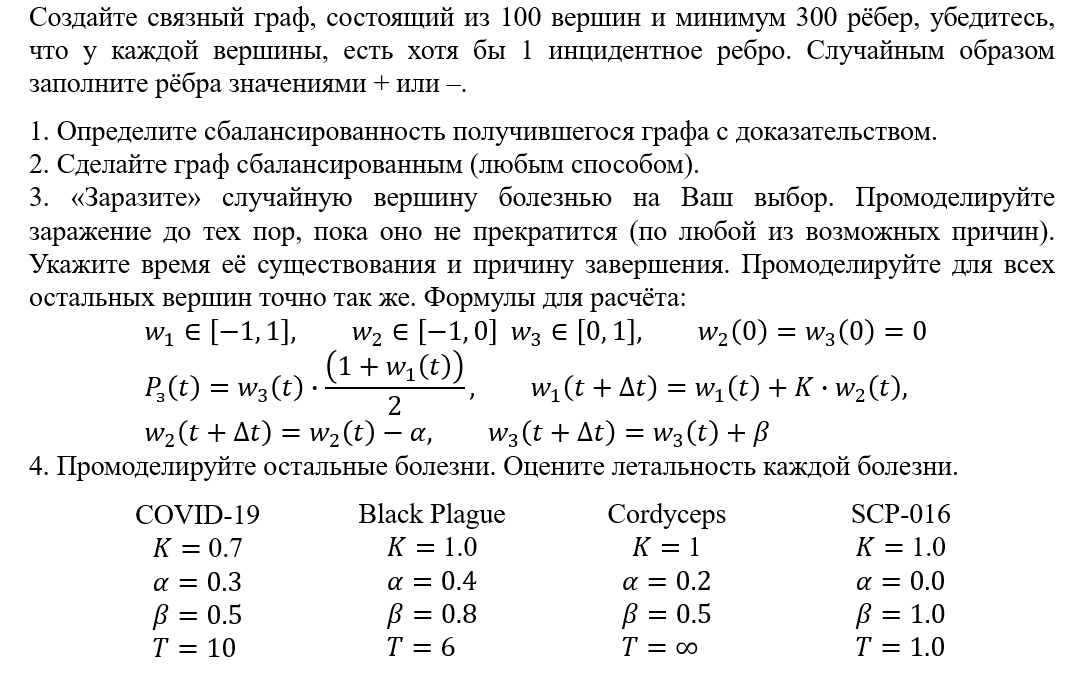

In [5]:
edges = [(np.random.randint(1, 101), np.random.randint(1, 101), np.random.choice([-1, 1])) for _ in range(300)]
G = nx.Graph()
G.add_weighted_edges_from(edges)

In [21]:
len(G.nodes)

100

In [9]:
all_edges = True
for node, degree in G.degree():
    if degree == 0:
        print(node)
        all_edges = False

if all_edges:
    print('У каждого узла есть как минимум одно ребро')
else:
    print('Не у каждого узла есть как минимум одно ребро')

У каждого узла есть как минимум одно ребро


In [ ]:
def is_balanced_signed_graph(graph):
    # Словарь для хранения классов вершин
    color = {}
    
    def bfs_check(start):
        queue = [start]
        color[start] = 0
        
        while queue:
            node = queue.pop(0)
            current_color = color[node]
            
            # Проверяем соседей
            for neighbor, edge_data in graph[node].items():
                if edge_data['weight'] == 1:  # Ребро с плюсом
                    if neighbor in color:
                        if color[neighbor] != current_color:
                            return False
                    else:
                        color[neighbor] = current_color
                        queue.append(neighbor)
                else:  # Ребро с минусом
                    if neighbor in color:
                        if color[neighbor] == current_color:
                            return False
                    else:
                        color[neighbor] = 1 - current_color
                        queue.append(neighbor)
        
        return True

    for node in graph.nodes:
        if node not in color:
            if not bfs_check(node):
                return False

    return True

is_balanced_signed_graph(G)

False

In [ ]:
def plague(G, start_node, w1, w2=0, w3=0, K=0.7, alpha=0.3, beta=0.5, T=10):
    newly_infected = True
    infected = set([start_node])
    died = set()
    alive = set(G.nodes)
    t = 0
    while newly_infected:
        